dataset

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/seonahryu/Desktop/urp/average_sentiment_nasdaq.csv", index_col='date', parse_dates=True)

In [3]:
# 데이터 확인
print(df.head())
# open : 주식 시장이 열릴 때 가격, 시장의 시작점 정보 -> 시장의 초기 반응 분석
# high : 특정 기간 동안의 최고 가격, 시장의 강세 -> 높은 가격은 강한 매수세, 지수 상승에 긍정적인 신호
# low : 특정 기간 동안의 최저 가격, 시장의 약세 -> 낮은 가격은 매도 압력, 지수 하락에 부정적인 신호
# volume : 거래량, 얼마나 많은 주식이 거래되었는지 -> 높은 거래량은 강한 시장 참여, 가격 변동에 대한 신뢰성 향상

            roberta_sentiment  vader_sentiment          Open          High  \
date                                                                         
2023-12-26          -0.312500         0.031250  15028.690430  15101.179688   
2023-12-27          -0.057143         0.285714  15089.660156  15114.080078   
2023-12-28          -0.840000        -0.480000  15142.089844  15150.070312   
2023-12-29          -0.800000        -0.500000  15099.200195  15111.410156   
2024-01-02          -0.137931         0.482759  14873.700195  14887.799805   

                     Low         Close      Volume     Adj Close  
date                                                              
2023-12-26  15024.059570  15074.570312  6120600000  15074.570312  
2023-12-27  15051.669922  15099.179688  7480170000  15099.179688  
2023-12-28  15087.219727  15095.139648  5090570000  15095.139648  
2023-12-29  14955.370117  15011.349609  5441060000  15011.349609  
2024-01-02  14682.379883  14765.940430  5791170000 

In [4]:
# 최대값과 최소값 계산
vader_max = df['vader_sentiment'].max()
vader_min = df['vader_sentiment'].min()
roberta_max = df['roberta_sentiment'].max()
roberta_min = df['roberta_sentiment'].min()

# 결과 출력
print(f"VADER Sentiment - 최대값: {vader_max}, 최소값: {vader_min}")
print(f"Roberta Sentiment - 최대값: {roberta_max}, 최소값: {roberta_min}")

VADER Sentiment - 최대값: 1.0, 최소값: -0.7142857142857143
Roberta Sentiment - 최대값: 1.0, 최소값: -1.0


In [5]:
df_spare = df.copy()

In [11]:
df['vader_sentiment']

date
2023-12-26    0.031250
2023-12-27    0.285714
2023-12-28   -0.480000
2023-12-29   -0.500000
2024-01-02    0.482759
                ...   
2024-12-18   -0.714286
2024-12-19    0.750000
2024-12-20    0.500000
2024-12-23    0.000000
2024-12-24    0.000000
Name: vader_sentiment, Length: 250, dtype: float64

In [12]:
df['roberta_sentiment']

date
2023-12-26   -0.312500
2023-12-27   -0.057143
2023-12-28   -0.840000
2023-12-29   -0.800000
2024-01-02   -0.137931
                ...   
2024-12-18   -0.857143
2024-12-19    0.000000
2024-12-20    0.000000
2024-12-23    0.000000
2024-12-24    0.000000
Name: roberta_sentiment, Length: 250, dtype: float64

0~1 사이로 정규화

In [6]:
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close']
scaler = MinMaxScaler(feature_range=(0, 1))
df_spare[features_to_scale] = scaler.fit_transform(df_spare[features_to_scale])

In [7]:
# VADER Sentiment 정규화
min_vader = -0.7142857142857143
max_vader = 1.0
df_spare['vader_sentiment'] = (df_spare['vader_sentiment'] - min_vader) / (max_vader - min_vader)

# Roberta Sentiment 정규화
min_roberta = -1.0
max_roberta = 1.0
df_spare['roberta_sentiment'] = (df_spare['roberta_sentiment'] - min_roberta) / (max_roberta - min_roberta)

# 결과 확인
print(df_spare.head())

            roberta_sentiment  vader_sentiment      Open      High       Low  \
date                                                                           
2023-12-26           0.343750         0.434896  0.094139  0.085312  0.098873   
2023-12-27           0.471429         0.583333  0.104998  0.087624  0.103869   
2023-12-28           0.080000         0.136667  0.114336  0.094075  0.110301   
2023-12-29           0.100000         0.125000  0.106697  0.087146  0.086446   
2024-01-02           0.431034         0.698276  0.066536  0.047068  0.037055   

               Close    Volume  Adj Close  
date                                       
2023-12-26  0.099631  0.292827   0.099631  
2023-12-27  0.103976  0.458252   0.103976  
2023-12-28  0.103263  0.167499   0.103263  
2023-12-29  0.088469  0.210144   0.088469  
2024-01-02  0.045138  0.252744   0.045138  


In [13]:
# 최대값과 최소값 계산
vader_max = df_spare['vader_sentiment'].max()
vader_min = df_spare['vader_sentiment'].min()

roberta_max = df_spare['roberta_sentiment'].max()
roberta_min = df_spare['roberta_sentiment'].min()

# 결과 출력
print(f"VADER Sentiment - 최대값: {vader_max}, 최소값: {vader_min}")
print(f"Roberta Sentiment - 최대값: {roberta_max}, 최소값: {roberta_min}")

VADER Sentiment - 최대값: 1.0, 최소값: 0.0
Roberta Sentiment - 최대값: 1.0, 최소값: 0.0


정규화 전후의 VADER와 RoBERTa Sentiment 분포 시각화

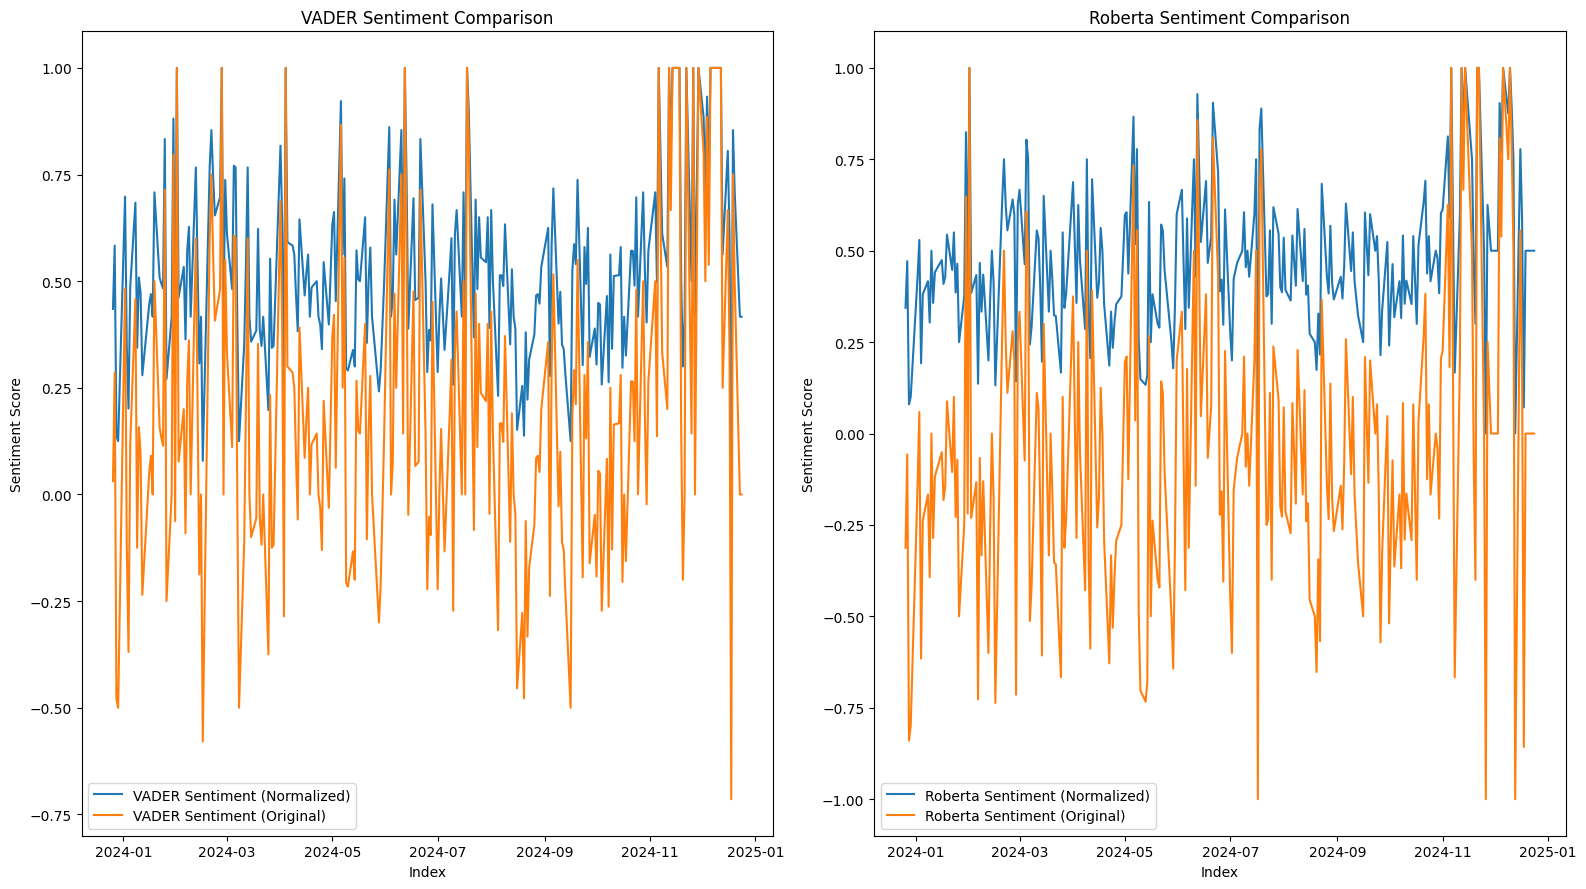

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

# 첫 번째 서브플롯: VADER Sentiment
sns.lineplot(ax=axes[0], x=df_spare.index, y=df_spare['vader_sentiment'], label='VADER Sentiment (Normalized)')
sns.lineplot(ax=axes[0], x=df.index, y=df['vader_sentiment'], label='VADER Sentiment (Original)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_title('VADER Sentiment Comparison')
axes[0].legend()

# 두 번째 서브플롯: Roberta Sentiment
sns.lineplot(ax=axes[1], x=df_spare.index, y=df_spare['roberta_sentiment'], label='Roberta Sentiment (Normalized)')
sns.lineplot(ax=axes[1], x=df.index, y=df['roberta_sentiment'], label='Roberta Sentiment (Original)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Sentiment Score')
axes[1].set_title('Roberta Sentiment Comparison')
axes[1].legend()

# 전체 플롯 표시
plt.tight_layout()
plt.show()

많은 변수를 균등하게 통합하기 위해 각각 변수들을 모두 1차원 형태로 변환

LSTM input {vader + roberta + nasdaq(open, high, low, volume)}

In [60]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment', 'roberta_sentiment', 'Open', 'High', 'Low', 'Volume']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [16]:
print(f"X.shape : {features_1d.shape}")
print(f"y.shape : {target_1d.shape}")

X.shape : (1500,)
y.shape : (250,)


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 6), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 6  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Batch Size: 32, MSE: 0.05124208726364106, RMSE: 0.2263671514677893


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Batch Size: 64, MSE: 0.0548823212682258, RMSE: 0.23426976174535585


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BA8B17A440> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Batch Size: 128, MSE: 0.05478410669019297, RMSE: 0.23406004932536645


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Batch Size: 256, MSE: 0.05201721964325546, RMSE: 0.22807283846011883


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Batch Size: 512, MSE: 0.05355312066930677, RMSE: 0.2314154719747726


In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 6), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 6  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
predictions_dict = {}  # 예측값 저장
history_dict = {}  # 손실 기록 저장

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_split=0.2)
    
    # 손실 기록 저장
    history_dict[batch_size] = history.history

    # 예측 수행
    y_pred = model.predict(X_test)
    
    # 예측값 저장
    predictions_dict[batch_size] = y_pred.flatten()

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Batch Size: 32, MSE: 0.05980898809728432, RMSE: 0.24455876205379418


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Batch Size: 64, MSE: 0.048044276788769144, RMSE: 0.21919004719368337


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Batch Size: 128, MSE: 0.05259693242701196, RMSE: 0.22934021109917022


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Batch Size: 256, MSE: 0.0539004032813549, RMSE: 0.23216460385113596


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Batch Size: 512, MSE: 0.05309692029288237, RMSE: 0.23042768994390056


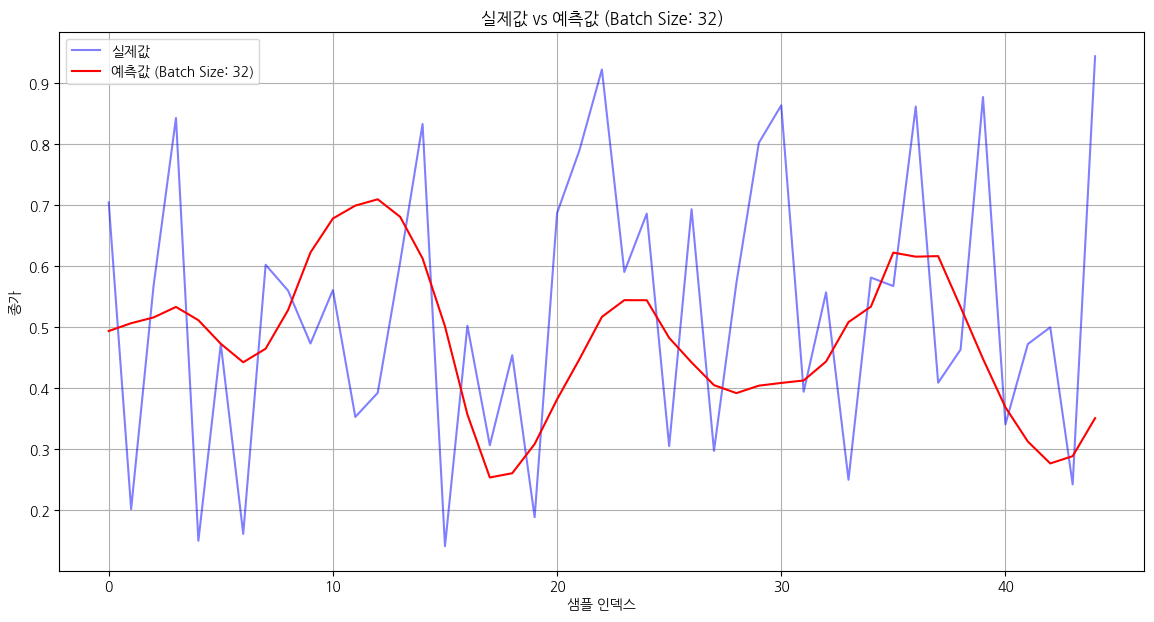

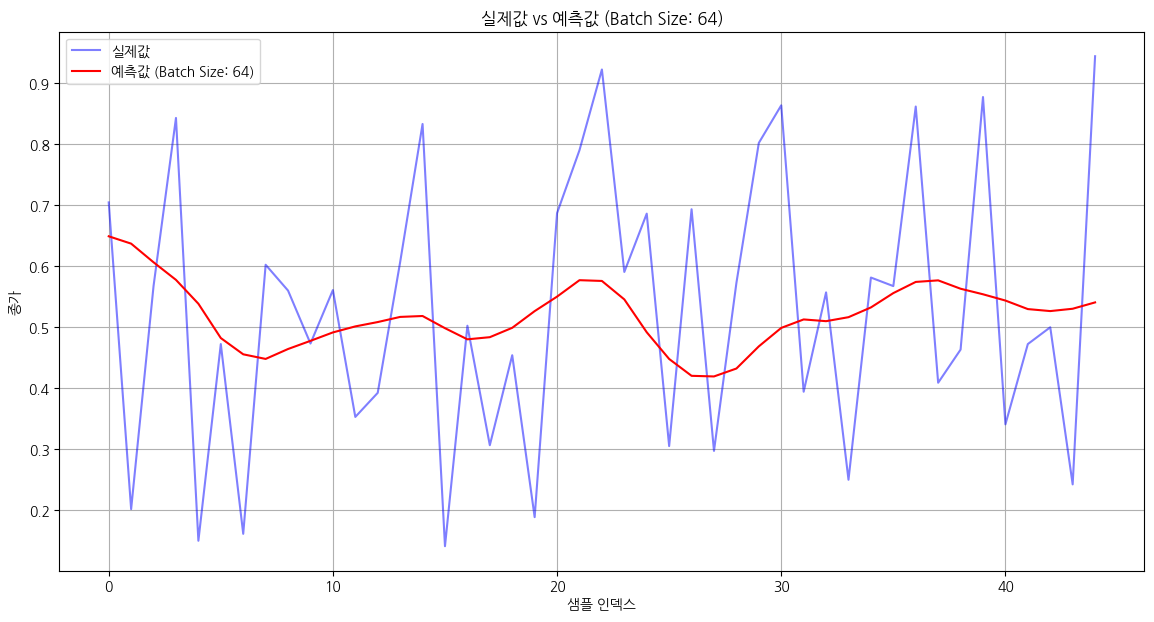

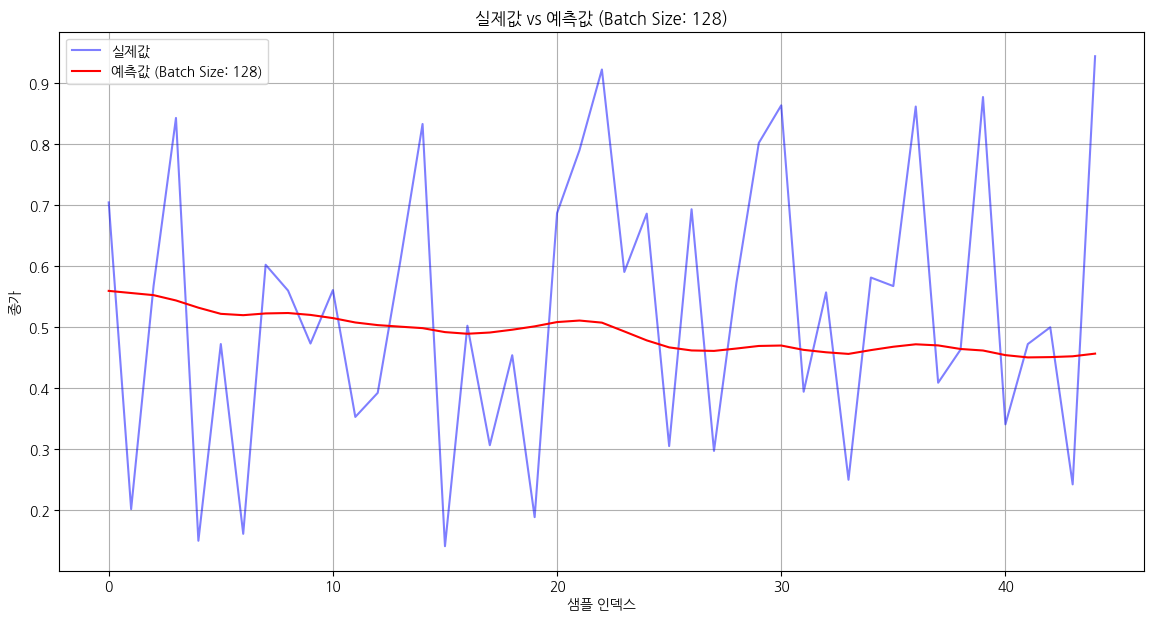

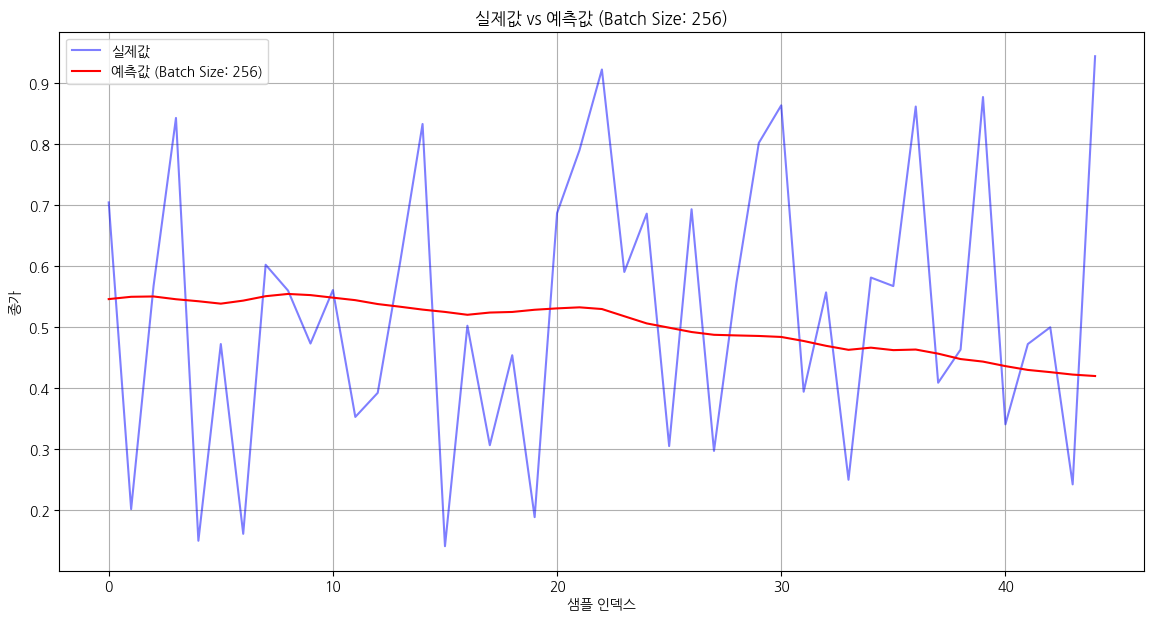

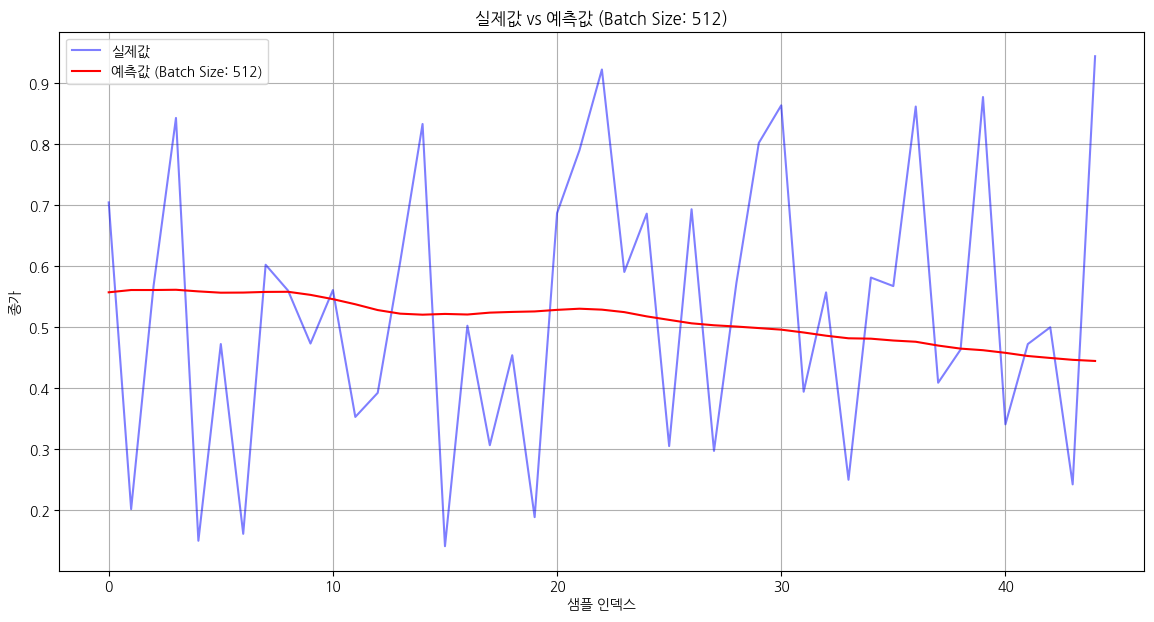

In [62]:
import matplotlib.pyplot as plt

# 시각화: 각 배치 사이즈별로 예측값과 실제값 그래프 그리기
for batch_size in batch_sizes:
    plt.figure(figsize=(14, 7))
    
    # 실제값 시각화
    plt.plot(y_test.flatten(), label='실제값', color='blue', alpha=0.5)
    
    # 예측값 시각화
    plt.plot(predictions_dict[batch_size], label=f'예측값 (Batch Size: {batch_size})', color='red')
    
    plt.title(f'실제값 vs 예측값 (Batch Size: {batch_size})')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('종가')
    plt.legend()
    plt.grid()
    plt.show()

LSTM input {vader + roberta}

In [18]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment', 'roberta_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 2), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 2  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Batch Size: 32, MSE: 0.05347040062761911, RMSE: 0.23123667664888092


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step
Batch Size: 64, MSE: 0.051244034933714586, RMSE: 0.2263714534425986


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Batch Size: 128, MSE: 0.054298642483425114, RMSE: 0.23302069110580098


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Batch Size: 256, MSE: 0.05062984120978197, RMSE: 0.22501075798677264


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Batch Size: 512, MSE: 0.051418745749949424, RMSE: 0.22675701918562394


LSTM input {nasdaq(open, high, low, volume)}

In [69]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['Open', 'High', 'Low', 'Volume']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 4), target_1d, test_size=0.2, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 4  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.3))
    model.add(LSTM(50))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Batch Size: 32, MSE: 0.047305499455323904, RMSE: 0.21749827460309634


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Batch Size: 64, MSE: 0.0464959752958707, RMSE: 0.21562925426729718


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Batch Size: 128, MSE: 0.04780634430564106, RMSE: 0.21864661969863852


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Batch Size: 256, MSE: 0.04546001723017438, RMSE: 0.21321354842076612


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Batch Size: 512, MSE: 0.045405545170228254, RMSE: 0.21308576951600558


LSTM input {vader}

In [22]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 1), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 1  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = create_model()
    model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0)

    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Batch Size: 32, MSE: 0.051255196554230095, RMSE: 0.22639610543079158


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Batch Size: 64, MSE: 0.05050231986525907, RMSE: 0.22472721211562047


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Batch Size: 128, MSE: 0.050271135597594004, RMSE: 0.22421225568107112


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Batch Size: 256, MSE: 0.05134973972868004, RMSE: 0.22660480958858759


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Batch Size: 512, MSE: 0.05112766792149688, RMSE: 0.2261142806668718


LSTM input {roberta}

In [24]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['roberta_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 1), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 1  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# LSTM 모델 정의
def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
predictions_dict = {}  # 예측값 저장
history_dict = {}  # 손실 기록 저장

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_split=0.2)
    
    # 손실 기록 저장
    history_dict[batch_size] = history.history

    # 예측 수행
    y_pred = model.predict(X_test)
    
    # 예측값 저장
    predictions_dict[batch_size] = y_pred.flatten()

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Batch Size: 32, MSE: 0.053078316023898044, RMSE: 0.23038731741113277


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Batch Size: 64, MSE: 0.05285147259148721, RMSE: 0.229894481428953


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Batch Size: 128, MSE: 0.05074988578979493, RMSE: 0.22527735303353272


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Batch Size: 256, MSE: 0.05085059361153383, RMSE: 0.22550076188681453


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Batch Size: 512, MSE: 0.05072259588351925, RMSE: 0.2252167753155152


In [ ]:
# 손실 시각화: 배치 크기별로 각각 그리기
for batch_size, history in history_dict.items():
    plt.figure(figsize=(12, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title(f'Training and Validation Loss (Batch Size {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [36]:
# 상관계수 계산
correlation = df_spare['vader_sentiment'].corr(df_spare['Close'])
print(f"VADER Sentiment와 Nasdaq 종가 간의 상관계수: {correlation:.2f}")

correlation = df_spare['roberta_sentiment'].corr(df_spare['Close'])
print(f"RoBERTa Sentiment와 Nasdaq 종가 간의 상관계수: {correlation:.2f}")

VADER Sentiment와 Nasdaq 종가 간의 상관계수: 0.23
RoBERTa Sentiment와 Nasdaq 종가 간의 상관계수: 0.26


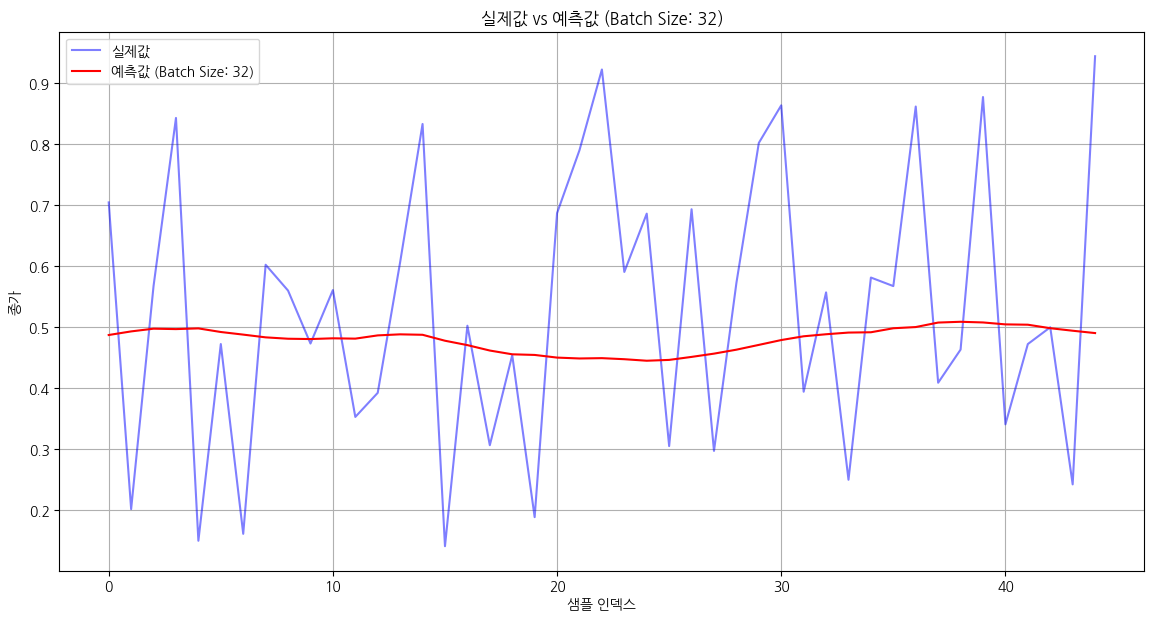

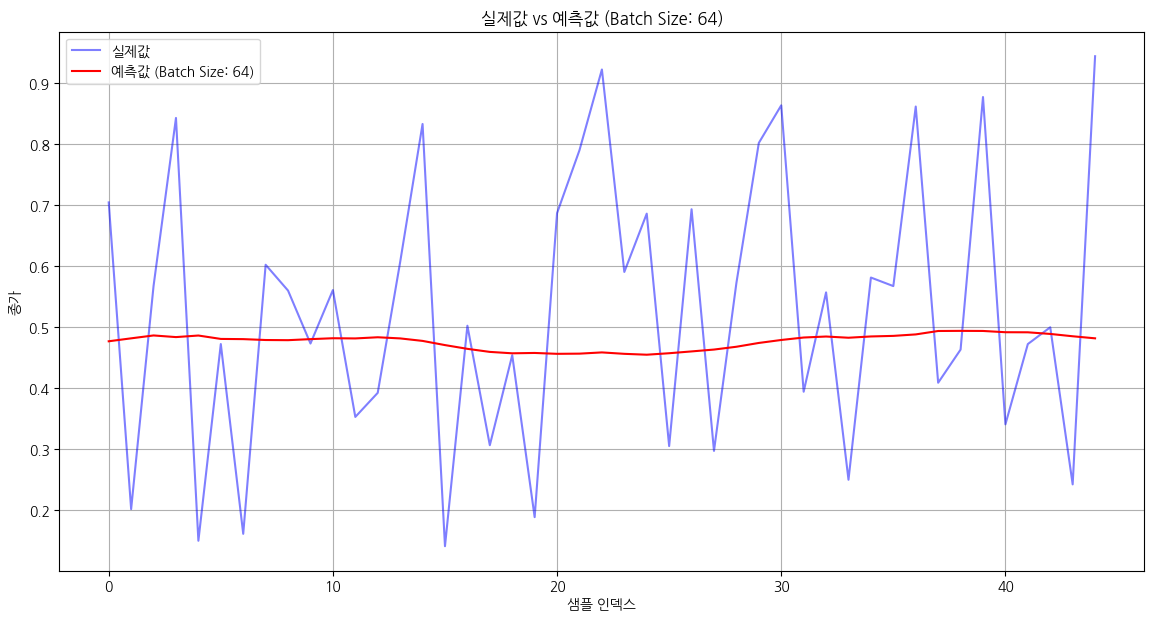

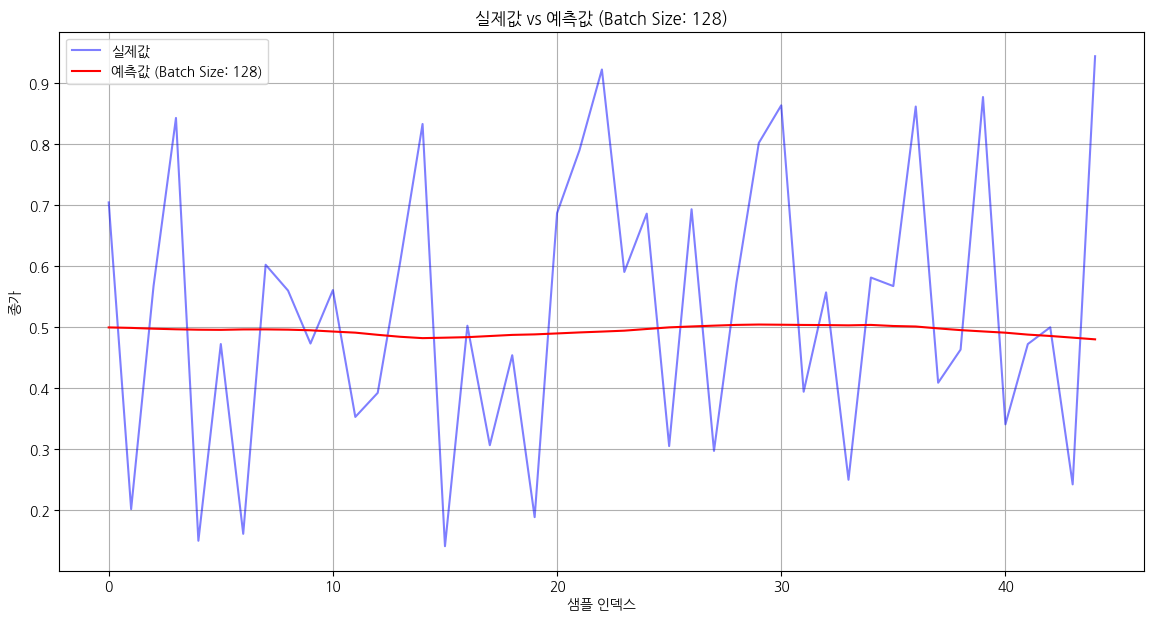

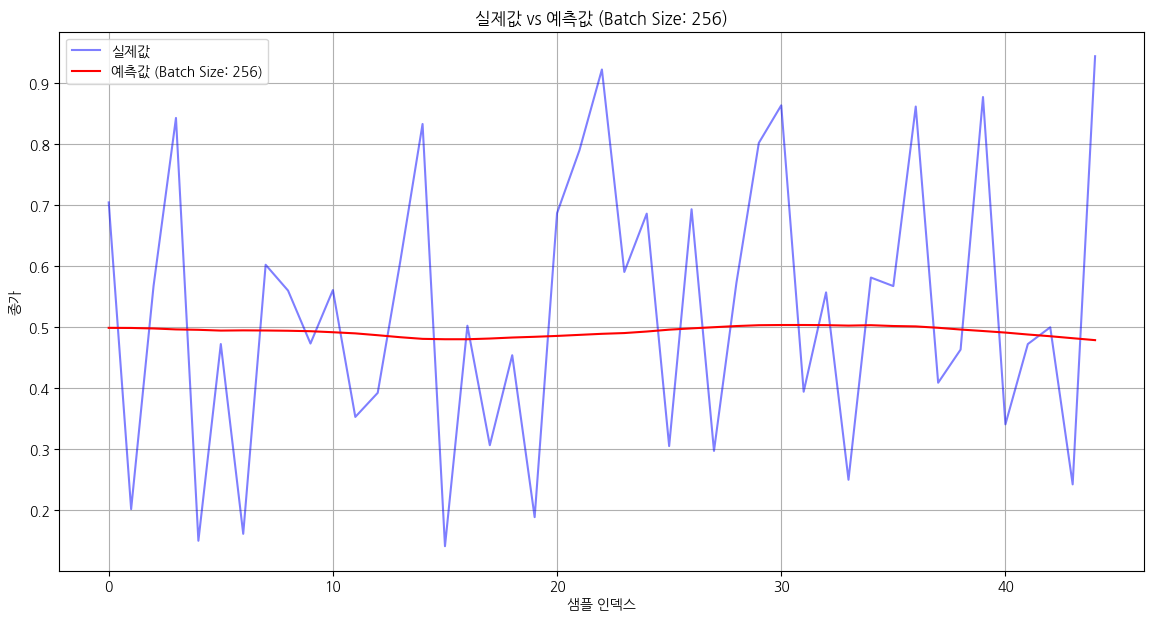

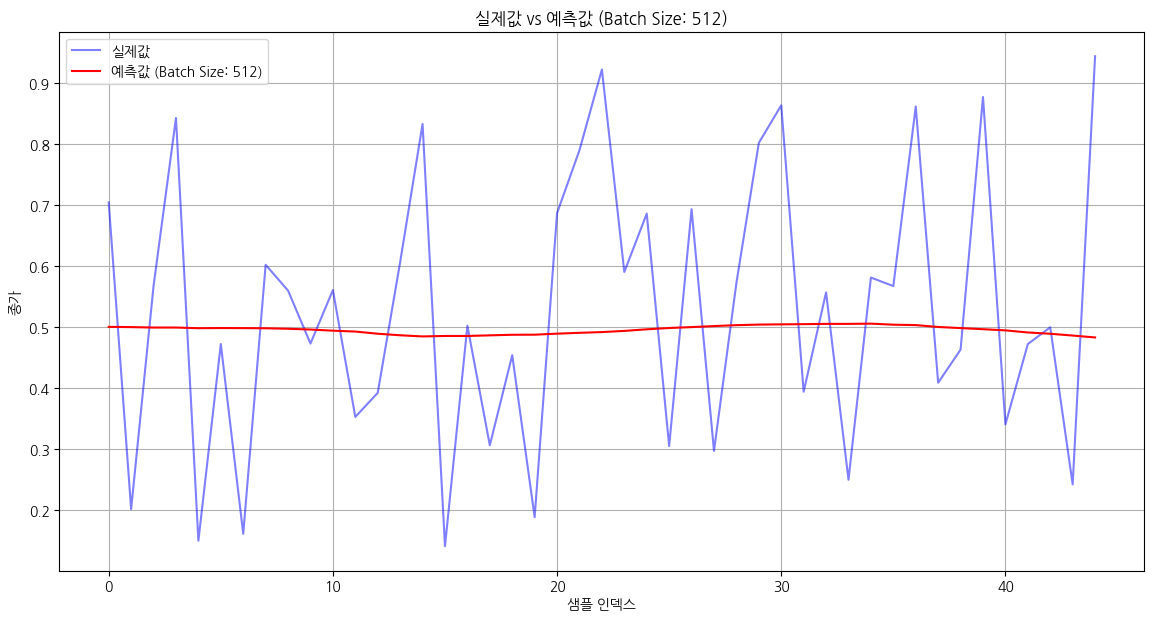

In [57]:
import matplotlib.pyplot as plt

# 시각화: 각 배치 사이즈별로 예측값과 실제값 그래프 그리기
for batch_size in batch_sizes:
    plt.figure(figsize=(14, 7))
    
    # 실제값 시각화
    plt.plot(y_test.flatten(), label='실제값', color='blue', alpha=0.5)
    
    # 예측값 시각화
    plt.plot(predictions_dict[batch_size], label=f'예측값 (Batch Size: {batch_size})', color='red')
    
    plt.title(f'실제값 vs 예측값 (Batch Size: {batch_size})')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('종가')
    plt.legend()
    plt.grid()
    plt.show()


GRU

In [64]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['vader_sentiment', 'roberta_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 2), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 2  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# GRU 모델 정의
def create_model():
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(GRU(64))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
predictions_dict = {}  # 예측값 저장
history_dict = {}  # 손실 기록 저장

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_split=0.2)
    
    # 손실 기록 저장
    history_dict[batch_size] = history.history

    # 예측 수행
    y_pred = model.predict(X_test)
    
    # 예측값 저장
    predictions_dict[batch_size] = y_pred.flatten()

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Batch Size: 32, MSE: 0.05291965519979676, RMSE: 0.23004272472694448


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Batch Size: 64, MSE: 0.051237427636657736, RMSE: 0.22635685904486688


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Batch Size: 128, MSE: 0.0514800353451711, RMSE: 0.2268921227040972


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Batch Size: 256, MSE: 0.05209315596855401, RMSE: 0.2282392515947991


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Batch Size: 512, MSE: 0.051304039715684466, RMSE: 0.2265039507727944


nasdaq + vader + roberta

In [67]:
# 모든 변수를 1차원 배열로 변환
features_1d = df_spare[['Open', 'High', 'Low', 'Volume', 'vader_sentiment', 'roberta_sentiment']].values.flatten()
target_1d = df_spare['Adj Close'].values.flatten()

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

# 데이터셋을 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(features_1d.reshape(-1, 6), target_1d, test_size=0.3, random_state=42)

# 데이터셋 생성 함수 정의
def create_dataset(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 데이터셋 생성
X_train, y_train = create_dataset(X_train, y_train)
X_test, y_test = create_dataset(X_test, y_test)

# feature 수 정의
num_features = 6  # X의 열 수(특징 수)

# X의 형태 조정: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# GRU 모델 정의
def create_model():
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape 사용
    model.add(Dropout(0.2))
    model.add(GRU(64))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))  # 출력층
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 다양한 배치 크기로 모델 학습
batch_sizes = [32, 64, 128, 256, 512]
predictions_dict = {}  # 예측값 저장
history_dict = {}  # 손실 기록 저장

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_split=0.2)
    
    # 손실 기록 저장
    history_dict[batch_size] = history.history

    # 예측 수행
    y_pred = model.predict(X_test)
    
    # 예측값 저장
    predictions_dict[batch_size] = y_pred.flatten()

    # MSE 및 RMSE 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}')

c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Batch Size: 32, MSE: 0.06691739708551686, RMSE: 0.25868397145071986


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Batch Size: 64, MSE: 0.05631794688576726, RMSE: 0.2373140258934715


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Batch Size: 128, MSE: 0.05441572679716744, RMSE: 0.2332717874008073


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Batch Size: 256, MSE: 0.055007142572928235, RMSE: 0.23453601551345635


c:\Users\seonahryu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Batch Size: 512, MSE: 0.05496701468649281, RMSE: 0.23445045251927496
